In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
#linear regression using gradient descent own fnction

def gradient_descent(x, y, learning_rate=0.01, epochs=1000):
    m = 0
    b = 0
    n = len(y)
    
    for _ in range(epochs):
        y_pred = m * x + b
        D_m = (-2/n) * sum(x * (y - y_pred))
        D_b = (-2/n) * sum(y - y_pred)
        m -= learning_rate * D_m
        b -= learning_rate * D_b
        # print loss for eveery epoch
        loss = (1/n) * sum((y - y_pred) ** 2)
        print(f'Epoch {_+1}, Loss: {loss}')
        
    return m, b
# Load dataset
data = pd.read_csv('data.csv')  # Ensure 'data.csv' is in the same directory
x = data['X'].values
y = data['Y'].values

# Perform gradient descent
m, b = gradient_descent(x, y)

# Plot the data and the regression line 
plt.scatter(x, y, color='blue', label='Data Points')
plt.plot(x, m * x + b, color='red', label='Regression Line')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()



FileNotFoundError: [Errno 2] No such file or directory: 'data.csv'

Epoch 1, Loss: 14138927750.492355
Epoch 2, Loss: 3.2036160446615153e+28
Epoch 3, Loss: 7.713476937459844e+46
Epoch 4, Loss: 1.8573295125930234e+65
Epoch 5, Loss: 4.472267791821155e+83
Epoch 6, Loss: 1.0768783392183865e+102
Epoch 7, Loss: 2.5930177070334177e+120
Epoch 8, Loss: 6.243733005038469e+138
Epoch 9, Loss: 1.5034298351478368e+157
Epoch 10, Loss: 3.620111986512989e+175
Epoch 11, Loss: 8.716875565800085e+193
Epoch 12, Loss: 2.0989383729764864e+212
Epoch 13, Loss: 5.054038296517563e+230
Epoch 14, Loss: 1.2169629862187616e+249
Epoch 15, Loss: 2.930327834767209e+267
Epoch 16, Loss: 7.055942798960284e+285
Epoch 17, Loss: 1.699002008973328e+304
Epoch 18, Loss: inf
Epoch 19, Loss: inf
Epoch 20, Loss: inf
Epoch 21, Loss: inf
Epoch 22, Loss: inf
Epoch 23, Loss: inf
Epoch 24, Loss: inf
Epoch 25, Loss: inf
Epoch 26, Loss: inf
Epoch 27, Loss: inf
Epoch 28, Loss: inf
Epoch 29, Loss: inf
Epoch 30, Loss: inf
Epoch 31, Loss: inf
Epoch 32, Loss: inf
Epoch 33, Loss: inf
Epoch 34, Loss: inf
Epoch 3

C:\Users\somu\AppData\Local\Temp\ipykernel_23624\2464712922.py:14: RuntimeWarning: overflow encountered in square
  loss = (1/n) * sum((y - y_pred) ** 2)


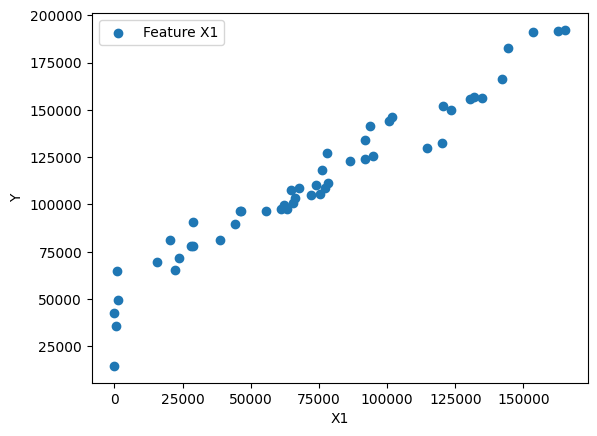

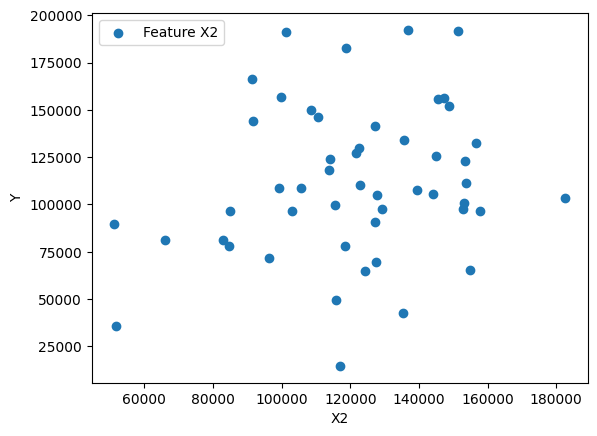

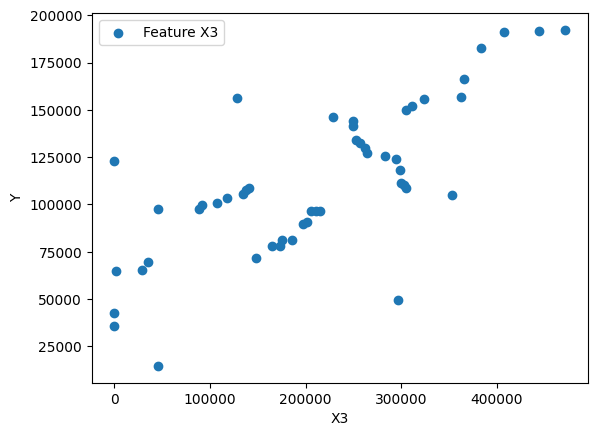

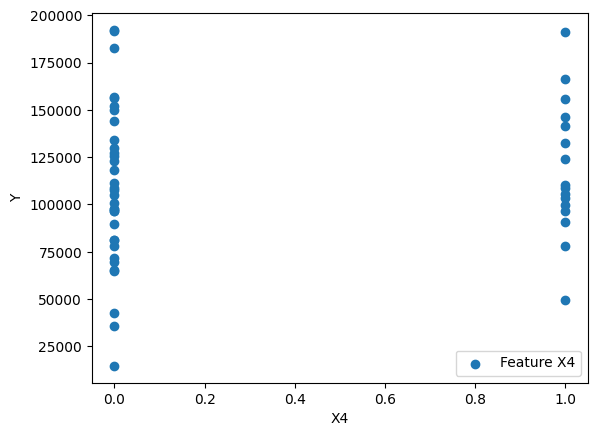

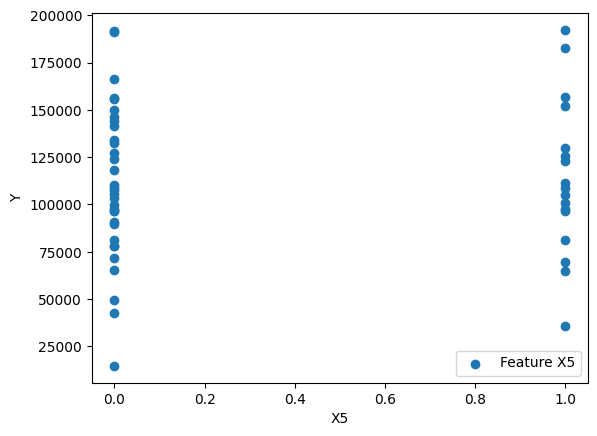

In [ ]:
# linear regrssion using gradient descent for multi features using own function
def gradient_descent_multi(X, y, learning_rate=0.01, epochs=1000):
    m = np.zeros(X.shape[1])
    b = 0
    n = len(y)
    
    for _ in range(epochs):
        y_pred = X.dot(m) + b
        D_m = (-2/n) * X.T.dot(y - y_pred)
        D_b = (-2/n) * sum(y - y_pred)
        m -= learning_rate * D_m
        b -= learning_rate * D_b
        
    return m, b
# Load dataset
data = pd.read_csv('data_multi.csv')  # Ensure 'data_multi.csv' is in the same directory
X = data[['X1', 'X2', 'X3']].values
y = data['Y'].values
# Perform gradient descent
m, b = gradient_descent_multi(X, y)

# Plot the data and the regression line

In [ ]:
#linear regression using gradient descent own fnction by plotting loss vs epochs and also plotting regression line at each epoch

def gradient_descent(x, y, learning_rate=0.01, epochs=1000):
    m = 0
    b = 0
    n = len(y)
    
    for _ in range(epochs):
        y_pred = m * x + b
        D_m = (-2/n) * sum(x * (y - y_pred))
        D_b = (-2/n) * sum(y - y_pred)
        m -= learning_rate * D_m
        b -= learning_rate * D_b
        # print loss for eveery epoch
        loss = (1/n) * sum((y - y_pred) ** 2)
        print(f'Epoch {_+1}, Loss: {loss}')
        # Plot loss vs epochs
        plt.figure(1)
        plt.scatter(_+1, loss, color='blue')
        plt.pause(0.01)
        # Plot regression line at each epoch
        plt.figure(2)
        plt.scatter(x, y, color='blue', label='Data Points')
        plt.plot(x, m * x + b, color='red', label='Regression Line')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.legend()
        plt.pause(0.1)

        
    return m, b
# Load dataset
data = pd.read_csv('data.csv')  # Ensure 'data.csv' is in the same directory
x = data['X'].values
y = data['Y'].values

# Perform gradient descent
m, b = gradient_descent(x, y)

# Plot the data and the regression line 
plt.scatter(x, y, color='blue', label='Data Points')
plt.plot(x, m * x + b, color='red', label='Regression Line')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()



In [3]:
# linear regression using sklearn library
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
df=pd.read_csv('50_Startups.csv') 
df # Ensure 'data.csv' is in the same directory

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [6]:
# unique values in each column count
df.nunique()

R&D Spend          49
Administration     50
Marketing Spend    48
State               3
Profit             50
dtype: int64

In [8]:
# ohe for state column with onehotencoder
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(drop='first')
x=ohe.fit_transform(df[['State']]).toarray()
x=np.concatenate((df[['R&D Spend','Administration','Marketing Spend']].values , x), axis=1)
y=df['Profit'].values
# train test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
#standardization
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)
# linear regression model
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred
# r2 score
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)


0.9536526671882583

In [9]:
# use polynomial features for better accuracy
from sklearn.preprocessing import PolynomialFeatures
pf=PolynomialFeatures(degree=4)
x_poly=pf.fit_transform(x)
x_poly
x_train,x_test,y_train,y_test=train_test_split(x_poly,y,test_size=0.2)
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
model.score(x_test,y_test)

-319.15422236477826

In [10]:
# Part 2 on medical_insurance.csv
df=pd.read_csv('medical_insurance.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


In [11]:
df.describe()

,age,bmi,children,charges
count,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,30.701349,1.101732,13261.369959
std,14.081459,6.129449,1.214806,12151.768945
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.220000,0.000000,4687.797000
50%,39.000000,30.447500,1.000000,9333.014350
75%,51.000000,34.770000,2.000000,16577.779500
max,64.000000,53.130000,5.000000,63770.428010


In [12]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [13]:
# ohe on sex,children,smoker,region columns
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(drop='first')
x=ohe.fit_transform(df[['sex','children','smoker','region']]).toarray()
x=np.concatenate((df[['age','bmi']].values , x), axis=1)
y=df['charges'].values
# train test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
#standardization
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)
# linear regression model
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred
# r2 score
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)
# cal mean squared error
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

39906653.599799424

In [14]:
# use polynomial features for better accuracy
# import mse 
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
# compare r2 score for degree 2,3,4,...10
pf=PolynomialFeatures(degree=2)
x_poly=pf.fit_transform(x)
x_train,x_test,y_train,y_test=train_test_split(x_poly,y,test_size=0.2)
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
model.score(x_test,y_test)
mean_squared_error(y_test,y_pred)


23341021.57566884

In [15]:
# r2 score for degree 2 --- IGNORE ---
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8401051687668534

In [16]:
# make pkl file for model
import pickle
with open('linear_regression_model.pkl', 'wb') as f:
    pickle.dump(model, f)